## Step 1 : Import libraries & the dataset

In [1]:
import pandas as pd


# read Bikeshare dataset
df_bike = pd.read_csv("Bike.csv").rename(columns={'cnt' : 'cnt_rental_bike'})

# sample 7 random rows of the dataframe
df_bike.sample(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
5396,5397,2011-08-17,3,0,8,18,0,3,1,1,0.76,0.6970,0.55,0.2537,86,470,556
2998,2999,2011-05-09,2,0,5,20,0,1,1,1,0.54,0.5152,0.49,0.1940,25,214,239
668,669,2011-01-31,1,0,1,4,0,1,1,1,0.20,0.1970,0.59,0.2239,0,2,2
10308,10309,2012-03-10,1,1,3,14,0,6,0,1,0.34,0.3182,0.27,0.2836,117,262,379
4899,4900,2011-07-28,3,0,7,1,0,4,1,1,0.72,0.6667,0.51,0.0000,3,26,29
13057,13058,2012-07-03,3,1,7,6,0,2,1,1,0.70,0.6515,0.65,0.1343,5,149,154
17286,17287,2012-12-28,1,1,12,3,0,5,1,2,0.24,0.2424,0.60,0.1642,0,2,2


## Step 2 : for the column 'weathersit', replace the values such as :  
1: 'clear'\
2: 'cloudy'\
3: 'light_rain'\
4: 'heavy_rain'

In [2]:
weather_types = ('clear', 'cloudy', 'light_rain', 'heavy_rain')
df_bike['weathersit'] = df_bike['weathersit'].map(lambda x: str(weather_types[x-1]))

In [3]:
df_bike['weathersit']

0         clear
1         clear
2         clear
3         clear
4         clear
          ...  
17374    cloudy
17375    cloudy
17376     clear
17377     clear
17378     clear
Name: weathersit, Length: 17379, dtype: object

## Step 3 : Using pandas only, explore your dataset

In [4]:
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df_bike.groupby('season').count()[['instant']]

,instant
season,
1,4242
2,4409
3,4496
4,4232


In [6]:
df_bike.groupby(['holiday', 'weekday']).count()[['instant']]

instant
holiday weekday         
0       0           2502
        1           2122
        2           2430
        3           2451
        4           2423
        5           2439
        6           2512
1       1            357
        2             23
        3             24
        4             48
        5             48

In [7]:
df_bike[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


In [8]:
df_bike['temp'].skew(), df_bike['temp'].kurtosis()
#rather symmetrical, not many extreme outliers

(np.float64(-0.00602088334827027), np.float64(-0.9418442040701822))

In [9]:
df_bike.groupby('weekday').sum()[['cnt_rental_bike']]

,cnt_rental_bike
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


In [10]:
df_bike.groupby('weekday').sum()[['registered']]

,registered
weekday,
0,303506
1,384719
2,411266
3,415729
4,423935
5,409552
6,323955


## Step 4 : The dataset has several columns related to date/time:

Create a new column `datetime` which will store information about both date and time.

In [11]:
from datetime import datetime

df_bike['datetime'] = pd.to_datetime(df_bike['dteday'] + ' ' + df_bike['hr'].astype(str) + ':00:00')

In [12]:
df_bike.head()['datetime']

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

## Step 5 : Vizualize the seasonality of rental bike

In [13]:
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


In [14]:
df_bike.groupby('season').mean('cnt_rental_bike')['cnt_rental_bike']

#third season (autumn) is the most prominent one

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt_rental_bike, dtype: float64

In [15]:
df_bike.groupby('season').sum('cnt_rental_bike')['cnt_rental_bike']

#once again aututmn wins

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt_rental_bike, dtype: int64

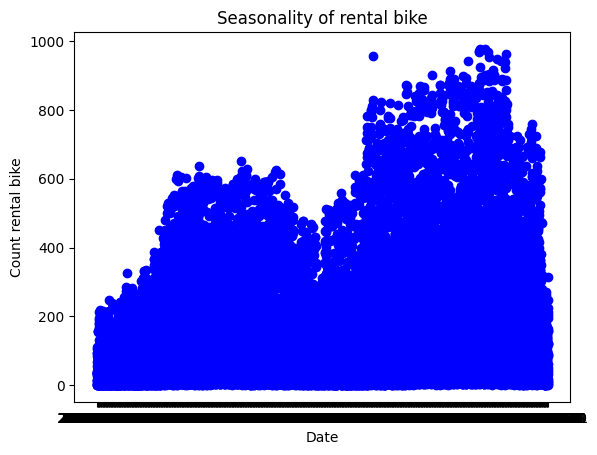

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df_bike['dteday'], df_bike['cnt_rental_bike'], color='b', marker='o')
plt.title('Seasonality of rental bike')
plt.xlabel('Date')
plt.ylabel('Count rental bike')


plt.show()

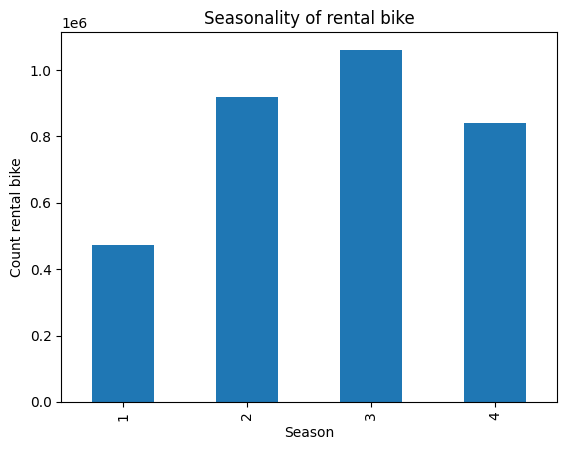

In [17]:
df_bike.groupby('season').sum('cnt_rental_bike')['cnt_rental_bike'].plot(kind='bar')
plt.title('Seasonality of rental bike')
plt.xlabel('Season')
plt.ylabel('Count rental bike')


plt.show()


## Step 6 : What's the datatype of 'Wheathersit'

In [18]:
print(df_bike['weathersit'].dtype)

object


## Step 7 : Count the values of Wheathersit and plot its distribution

In [19]:


df_bike['weathersit'].value_counts()

weathersit
clear         11413
cloudy         4544
light_rain     1419
heavy_rain        3
Name: count, dtype: int64

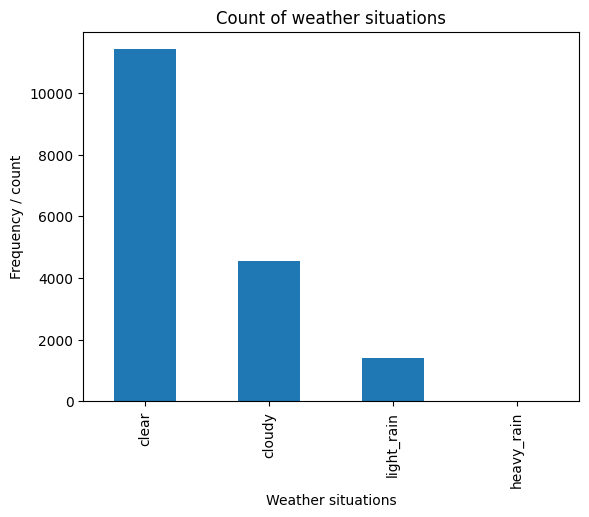

In [20]:
weather_counts = df_bike['weathersit'].value_counts()

weather_counts.plot(kind='bar')
plt.title('Count of weather situations')
plt.xlabel('Weather situations')
plt.ylabel('Frequency / count')
plt.show()

## Step 8 : What's the number of $K$ in this column.

In [21]:
K = df_bike['weathersit'].value_counts().shape[0]
K

4

## Step 9 : Implement your own One-Hot-Encoding algorithm. Encode weathersit column

In [36]:
one_hot = pd.get_dummies(df_bike['weathersit']).astype(int)
df_bike = df_bike.join(one_hot)
df_bike.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt_rental_bike,datetime,clear,cloudy,heavy_rain,light_rain
13578,13579,2012-07-24,3,1,7,23,0,2,1,clear,...,0.58,0.3284,38,154,192,2012-07-24 23:00:00,1,0,0,0
13159,13160,2012-07-07,3,1,7,12,0,6,0,clear,...,0.31,0.3582,124,218,342,2012-07-07 12:00:00,1,0,0,0
763,764,2011-02-04,1,0,2,6,0,5,1,cloudy,...,0.55,0.0000,2,26,28,2011-02-04 06:00:00,0,1,0,0
1405,1406,2011-03-03,1,0,3,20,0,4,1,clear,...,0.40,0.0896,1,69,70,2011-03-03 20:00:00,1,0,0,0
8651,8652,2012-01-01,1,1,1,6,0,0,0,clear,...,0.93,0.1343,1,1,2,2012-01-01 06:00:00,1,0,0,0
4072,4073,2011-06-23,3,0,6,14,0,4,1,cloudy,...,0.66,0.2985,46,103,149,2011-06-23 14:00:00,0,1,0,0
13514,13515,2012-07-22,3,1,7,7,0,0,0,cloudy,...,0.83,0.0000,13,25,38,2012-07-22 07:00:00,0,1,0,0
7481,7482,2011-11-13,4,0,11,8,0,0,0,clear,...,0.66,0.0896,24,55,79,2011-11-13 08:00:00,1,0,0,0
5381,5382,2011-08-17,3,0,8,3,0,3,1,clear,...,0.78,0.0000,1,4,5,2011-08-17 03:00:00,1,0,0,0
1506,1507,2011-03-08,1,0,3,3,0,2,1,clear,...,0.52,0.0896,5,2,7,2011-03-08 03:00:00,1,0,0,0


## Step 10 : Use scikit-learn OHE encoder for the same column

#### Delete old OHE

In [37]:
df_bike = df_bike.drop(columns=['clear', 'cloudy', 'heavy_rain', 'light_rain'])
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
17375,17376,2012-12-31,1,1,12,20,0,1,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
17376,17377,2012-12-31,1,1,12,21,0,1,1,clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00
17377,17378,2012-12-31,1,1,12,22,0,1,1,clear,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00


#### New OHE with SKLearn

In [48]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
weathersit = df_bike[['weathersit']]
ohe.fit_transform(weathersit)
ohe.set_params(sparse_output=False)

ohe.set_output(transform='pandas')
one_hot_sk = ohe.transform(weathersit).astype(int)
one_hot_sk = one_hot_sk.rename(columns={'weathersit_clear' : 'clear', 
                           'weathersit_cloudy' : 'cloudy', 
                           'weathersit_heavy_rain' : 'heavy_rain', 
                           'weathersit_light_rain' : 'light_rain'})
one_hot_sk

,clear,cloudy,heavy_rain,light_rain
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17374,0,1,0,0
17375,0,1,0,0
17376,1,0,0,0
17377,1,0,0,0


## Step 11 : Compare your encoded columns with the SKLearn ones

In [50]:
one_hot_sk.compare(one_hot).shape

(0, 0)

As we can see, there is no difference between the 2 one hot encodings

## Step 12 : Modify your algorithm to drop one column while encoding

In [54]:
ohe_drop = OneHotEncoder(drop=['heavy_rain'])
ohe_drop.set_params(sparse_output=False)
ohe_drop.set_output(transform='pandas')
one_hot_drop = ohe_drop.fit_transform(weathersit).astype(int)
one_hot_drop

,weathersit_clear,weathersit_cloudy,weathersit_light_rain
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
17374,0,1,0
17375,0,1,0
17376,1,0,0
17377,1,0,0


In [57]:
df_bike = df_bike.join(one_hot_drop)

We dropped the heavy rain category. Yay!

## Step 13 : What are advantages and disadvantages of such encoding of a categorical varable? Does the answer depend on whether it is nominal or ordinal?

One-Hot encoding works as follows:

If a categorical feature belongs to the finite set $\{1..K\}$ it is encoded by a binary vector
$$(
\delta_1, ...\delta_k 
) \in \{0,1\}^K, \sum_{i=1}^{K}\delta_i = 1$$
where $(\delta_1, ...\delta_k )$ is a vector ok K features

Properties:
- each $\delta_i$ is a binary (0 or 1)
- only $\delta_i$ one can be 1 at a time

The advantages of using OHE:
- transforming categorical data into numerical (binary to be precise) data to work with matrix algebra
- no assumption about order, in other words, neither category is treated as a larger number
- no bias
- wide support in ML models

The disadvantages of using OHE:
- higher dimension of resulting dataframe / matrix
- may cause problems specifically with models like **linear regression** that rely on **matrix inversions** and can assume that independent variables exhibit full rank.


p.s. i like using math notation in Obsidian)

## Step 14 : What can be said about linear dependence of the columns produced by one-hot-encoding? Consider two cases: with and without dropping.

In case of not dropping a column, if the model has a constant term (like tree-based models or linear regression), then the terms will be linearly dependent and hence the model will be unidentifiable. For example, if the model is linear regression, we use a $\overline{1}$ vector, there will be linear dependence in the matrix with our one-hot encoded data.

In case of dropping a column, such a problem will not exist. By dropping one column, we remove the issue of multicollinearity and reduce redundancy. Hence, tree based models and linear regression will work correctly.


## Step 15 : Repeat the steps 7 to 9, for label encoding

In [58]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime,weathersit_clear,weathersit_cloudy,weathersit_light_rain
0,1,2011-01-01,1,0,1,0,0,6,0,clear,...,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,1,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,clear,...,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,1,0,0


In [59]:
df_bike.drop(columns=['weathersit_clear', 'weathersit_cloudy', 'weathersit_light_rain'])
label_encoding = {
    'clear' : 0,
    'cloudy' : 1,
    'light_rain' : 2,
    'heavy_rain' : 3
}

df_bike['weathersit_label'] = df_bike['weathersit'].map(lambda x: label_encoding[x])

In [60]:
df_bike['weathersit_label'].value_counts()

weathersit_label
0    11413
1     4544
2     1419
3        3
Name: count, dtype: int64

In [61]:
df_bike['weathersit'].value_counts()

weathersit
clear         11413
cloudy         4544
light_rain     1419
heavy_rain        3
Name: count, dtype: int64

Everything went well!